# 🧩 Training, Testing, and Validation Datasets

When we build a machine learning model, we split the dataset into **different parts** to train and evaluate the model properly.

---

### 🔹 **1. Training Dataset**
- Used to **train** the model — i.e., the model learns the relationships or patterns from this data.
- Example: Adjusting weights in regression or parameters in a neural network.

---

### 🔹 **2. Validation Dataset**
- Used to **tune hyperparameters** and select the best model.
- Helps prevent **overfitting** because the model is tested on unseen data during training.
- Example: Choosing the best polynomial degree or learning rate.

---

### 🔹 **3. Testing Dataset**
- Used **only after training is complete** to **evaluate model performance**.
- This shows how well the model generalizes to completely new, unseen data.

---

### ⚖️ **Typical Split Ratios**
| Dataset | Percentage of Data |
|:---------|:------------------:|
| Training | 70–80% |
| Validation | 10–15% |
| Testing | 10–15% |

---

### 🧠 **Goal**
We want the model to perform **well on both training and testing data** — that means it generalizes well and doesn’t overfit or underfit.


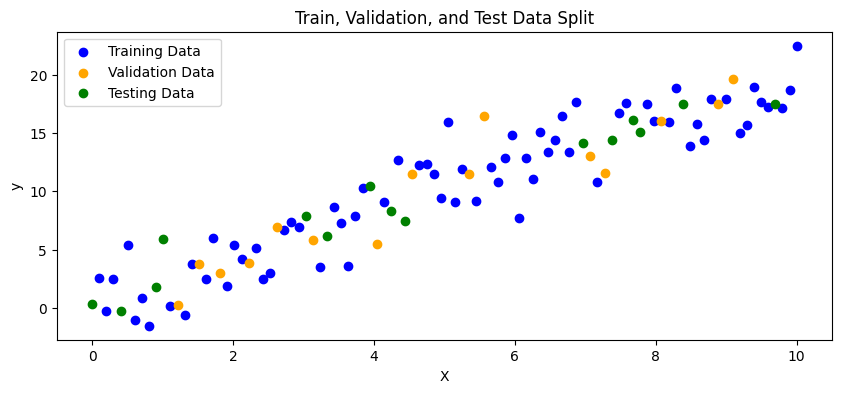

Training samples: 70
Validation samples: 15
Testing samples: 15


In [1]:
# 📊 Demonstrating Train, Validation, and Test Splitting

import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a synthetic dataset
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.randn(100) * 2  # y = 2x + noise

# Step 1: Split data into Train + Temp (Test+Validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split Temp into Validation + Test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Visualize splits
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_val, y_val, label='Validation Data', color='orange')
plt.scatter(X_test, y_test, label='Testing Data', color='green')
plt.title("Train, Validation, and Test Data Split")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Display counts
print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")
print(f"Testing samples: {len(X_test)}")


## 📊 Effect of Train–Validation–Test Split on Model Performance

Different split ratios can affect how well a model learns and generalizes.

- If **training data is too small**, the model doesn’t learn enough → **underfitting**.
- If **test data is too small**, evaluation becomes unreliable.
- A **balanced split** gives both good learning and fair evaluation.

Let’s visualize how performance changes for different splits.


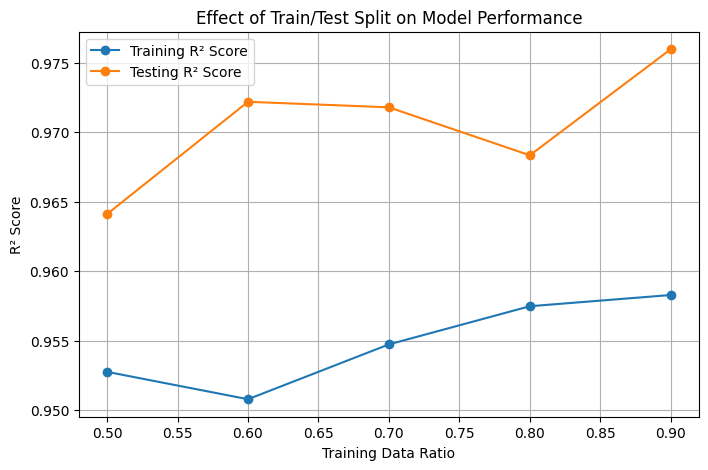

In [2]:
# 📈 Visualizing performance for different train/test splits

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 2

# Different split ratios
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]  # test sizes
train_scores, test_scores = [], []

for test_size in split_ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # R² scores
    train_scores.append(r2_score(y_train, y_pred_train))
    test_scores.append(r2_score(y_test, y_pred_test))

# Plot the effect of test size on model performance
plt.figure(figsize=(8, 5))
plt.plot([1 - r for r in split_ratios], train_scores, marker='o', label='Training R² Score')
plt.plot([1 - r for r in split_ratios], test_scores, marker='o', label='Testing R² Score')
plt.title("Effect of Train/Test Split on Model Performance")
plt.xlabel("Training Data Ratio")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


### 🧠 **Interpretation**

- As **training size increases**, the model fits better (higher training R²).
- But **too little test data** makes it hard to judge performance accurately.
- As **test size increases**, training data shrinks → the model may perform worse.

✅ **Ideal balance:** Around **80% training / 10–20% testing**, plus **10–15% validation** for hyperparameter tuning.

---

### 📈 Summary:
- **Training Set:** Model learns patterns here.
- **Validation Set:** Used to fine-tune and select best model settings.
- **Test Set:** Used to evaluate final model accuracy on unseen data.

✅ Proper splitting helps avoid **overfitting** and ensures **better generalization**.
